[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/en/tutorial/notebooks/panoramic_stitching)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from __code.ui_builder import UiBuilder
o_builder = UiBuilder(ui_name = 'ui_panoramic_stitching.ui')

from __code.panoramic_stitching import Interface, InterfaceHandler

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

In [ ]:
%gui qt

# Select Images

In [ ]:
o_template = InterfaceHandler(working_dir=system.System.get_working_dir())
o_template.select_images(instruction='Select tiff or Fits Images ...')

# Display Images

In [ ]:
o_template.load()
o_interface = Interface(o_norm=o_template.o_norm)
o_interface.show()

# FOR DEBUGGING

In [1]:
from __code.ui_builder import UiBuilder
o_builder = UiBuilder(ui_name = 'ui_panoramic_stitching.ui')

import glob
from NeuNorm.normalization import Normalization
from __code.panoramic_stitching import Interface, InterfaceHandler

IPTS_folder = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21632-Ed-Jeff-Katie/'
#IPTS_folder = '/Users/j35/IPTS/IPTS-21632/'

list_of_images = glob.glob(IPTS_folder + "4_images_to_stitch/*.tiff")
list_of_images.sort()
list_of_images = list_of_images[0:2]
configuration = IPTS_folder + 'roi.txt'
o_norm = Normalization()
o_norm.load(file=list_of_images, notebook=True)

from __code import system
# system.System.select_working_dir()

o_template = InterfaceHandler()
o_template.o_norm = o_norm

pyuic5 /Volumes/my_book_thunderbolt_duo/git/IPTS/python_notebooks/ui/ui_panoramic_stitching.ui -o /Volumes/my_book_thunderbolt_duo/git/IPTS/python_notebooks/__code/ui_panoramic_stitching.py


In [2]:
%gui qt

In [3]:
o_interface = Interface(o_norm=o_template.o_norm, configuration=configuration)
o_interface.show()

In [4]:
o_interface.master_dict

OrderedDict([(0,
              {'associated_with_file_index': 0,
               'reference_combobox_file_index': 0,
               'reference_roi': {'x0': 1719,
                'y0': 147,
                'width': 196,
                'height': 239},
               'target_combobox_file_index': 1,
               'target_roi': {'x0': 1670,
                'y0': 1675,
                'width': 295,
                'height': 360},
               'status': ''})])

Reference:
x0:1719, y0:147, width:196, height:239
target:
x0:1670, y0:1675, width:295, height:360
optimum x0:[1694] and optimum y0:[1675]


In [21]:
counts_x0 = o_interface.debug_list_of_counts_x0
counts_y0 = o_interface.debug_list_of_counts_y0

In [29]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


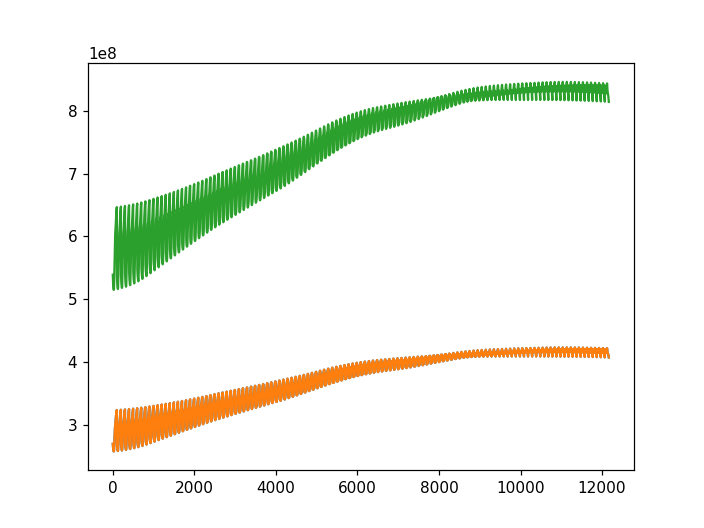

In [30]:
fig = plt.figure()
plt.plot(counts_x0)
plt.plot(counts_y0)

In [26]:
counts_x0_y0_sum = counts_x0 + counts_y0

In [31]:
np.size(counts_x0_y0_sum)

12166

In [32]:
fig = plt.figure(1)
plt.plot(counts_x0_y0_sum)
